# Regresión lineal para predicción de progresión de diabetes
- age: Representa la edad del paciente, normalizada (no es la edad real, sino una representación estandarizada).
- sex: Sexo del paciente, representado como una variable numérica normalizada (valores entre -0.5 y 0.5).
- bmi: Índice de Masa Corporal (Body Mass Index, BMI), una medida del peso relativo al cuadrado de la altura.
- bp:
Promedio de presión arterial (Blood Pressure, BP), normalizada.
- s1: Nivel sérico de lípidos totales (colesterol total).
- s2: Nivel sérico de lipoproteínas de baja densidad (LDL, “colesterol malo”).
- s3: Nivel sérico de lipoproteínas de alta densidad (HDL, “colesterol bueno”).
- s4: Relación entre el colesterol total y HDL.
- s5: Nivel sérico de triglicéridos, representado como una medida numérica normalizada.
- s6: Nivel sérico de glucosa en ayuno, una medida clave en el monitoreo de la diabetes.

In [40]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Cargar el conjunto de datos
diabetes_data = load_diabetes()

# Convertir el conjunto de datos a un DataFrame para facilitar su manipulación
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target  # Agregar la variable objetivo al DataFrame

# Mostrar las primeras filas del DataFrame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


El conjunto de datos Diabetes contiene información médica de pacientes, como IMC, presión arterial, y niveles de glucosa, recopilada para estudiar la progresión de la diabetes un año después de la evaluación inicial. Es un conjunto ampliamente utilizado en problemas de regresión en el contexto médico.

El objetivo es construir un modelo de regresión lineal que prediga la progresión de la diabetes un año después, utilizando características médicas como entrada. Este modelo permitirá analizar cómo los factores médicos impactan en la progresión de la enfermedad.

El conjunto de datos viene precargado en scikit-learn, por lo tanto, no tendrás que descargar datos de ningún sitio.

Repositorio Remoto de Github: https://github.com/PinedaAlan/regresion_lineal

Al terminar, sube tu código a tu repositorio, y toma una captura de pantalla de la evaluación final de tu modelo.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=["target"])  # Características
y = df["target"]  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Evaluar el modelo
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

# Resultados
print(f"RMSE (Entrenamiento): {rmse_train:.2f}")
print(f"RMSE (Prueba): {rmse_test:.2f}")
print(f"R2 Score (Prueba): {r2_test:.2f}")

RMSE (Entrenamiento): 53.56
RMSE (Prueba): 53.85
R2 Score (Prueba): 0.45


In [42]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coef_df)


  Feature  Coefficient
0     age     1.753758
1     sex   -11.511809
2     bmi    25.607121
3      bp    16.828872
4      s1   -44.448856
5      s2    24.640954
6      s3     7.676978
7      s4    13.138784
8      s5    35.161195
9      s6     2.351364


Los coeficientes del modelo representan la contribución de cada variable médica a la progresión de la diabetes. Cada coeficiente está alineado con su respectiva característica según el orden de las columnas del conjunto de datos. Al utilizar datos estandarizados, los coeficientes reflejan el impacto relativo de cada variable en términos de desviaciones estándar.

In [43]:
# Interseccion con eje vertical y
print(model.intercept_)

153.73654390934846


In [44]:
# Ecuacion lineal
ecuacion = "y = "
for n, col in enumerate(X.columns):
    ecuacion += f"{round(model.coef_[n], 4)} {col} + "

ecuacion += f"{round(model.intercept_,4)}"
print(ecuacion)


y = 1.7538 age + -11.5118 sex + 25.6071 bmi + 16.8289 bp + -44.4489 s1 + 24.641 s2 + 7.677 s3 + 13.1388 s4 + 35.1612 s5 + 2.3514 s6 + 153.7365


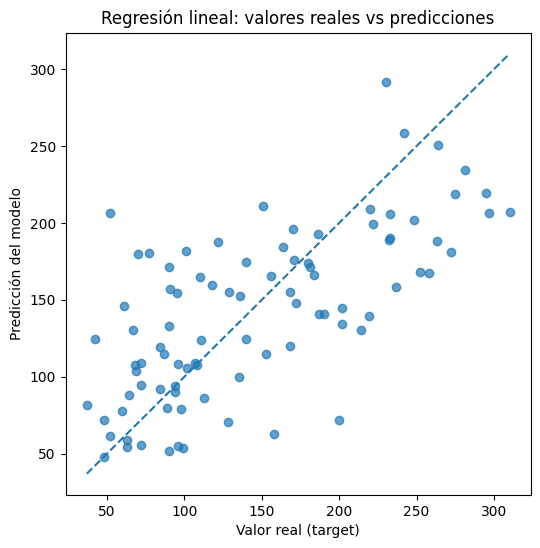

In [ ]:
plt.figure(figsize=(6,6))

plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)

plt.xlabel("Valor real (target)")
plt.ylabel("Predicción del modelo")
plt.title("Regresión lineal: valores reales vs predicciones")
plt.show()


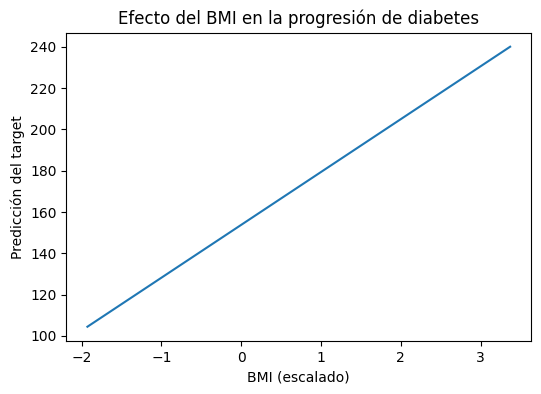

In [46]:
# Usar el conjunto de entrenamiento escalado
bmi_index = list(X.columns).index("bmi")

bmi_values = X_train_scaled[:, bmi_index]
bmi_range = np.linspace(bmi_values.min(), bmi_values.max(), 100)

# Crear valores promedio para el resto de variables
X_mean = X_train_scaled.mean(axis=0)

# Generar predicciones variando solo BMI
y_bmi = []
for val in bmi_range:
    x_temp = X_mean.copy()
    x_temp[bmi_index] = val
    y_bmi.append(model.predict([x_temp])[0])

# Gráfica
plt.figure(figsize=(6,4))
plt.plot(bmi_range, y_bmi)
plt.xlabel("BMI (escalado)")
plt.ylabel("Predicción del target")
plt.title("Efecto del BMI en la progresión de diabetes")
plt.show()


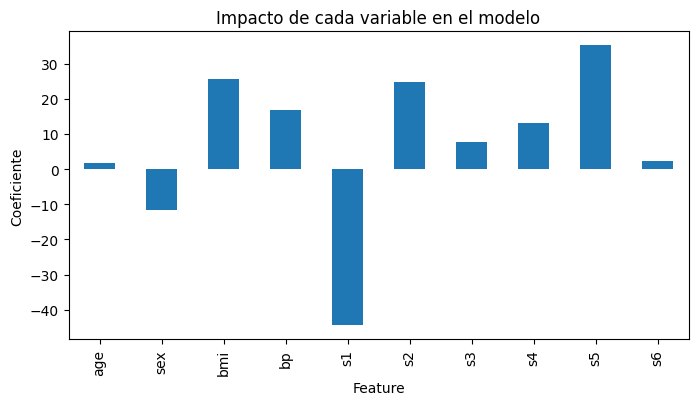

In [47]:
coef_df.plot(
    x="Feature",
    y="Coefficient",
    kind="bar",
    legend=False,
    figsize=(8,4)
)

plt.title("Impacto de cada variable en el modelo")
plt.ylabel("Coeficiente")
plt.show()
